<a href="https://colab.research.google.com/github/caiojvn/Classification---Machine-Learning/blob/main/Trabalho%20I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho I

## Parte Teórica

*Faça uma descrição de como funcionam generalizações dos classificadores binários para o cenário multiclasse, para os classificadores que vimos até o momento. Mais especificamente, você deverá dizer como que cada um deles pode ser generalizado para problemas multiclasse (é naturalmente embutido em sua teoria? É necessário alguma técnica adicional? O que é OvO? O que é OvA?) Descreva também como que as métricas que vimos são generalizadas para o cenário multiclasse.*

* Naive Bayes: nesse classificador o funcionamento para dados binários funciona perfeitamente do mesmo modo que ocorre com variáveis multiclasses, não sendo preciso utilizar qualquer técnica adicional.

* LDA e QDA: para os classificadores LDA e QDA, a adaptação para variáveis multiclasses não são necessárias, pois os classificadores têm capacidades de operar tanto com variáveis binárias quanto variáveis multiclasses. 

* SVM: no classificador SVM, para todos os kernels, a distinção de variáveis multiclasses é não possível no algorítmo, sendo necessário transformar as variáveis multiclasses em variáveis binárias (OvO, OvR) para construir o hiperplano que maximize as margens dos vetores de suporte.

***

* OvO: essa técnica consiste em avaliar as classes em pares e compara-las, selecionando a que possuir mais votos até que todas as classes tenham sido avaliadas. 
É importante ressaltar que o processo pode exigir um custo computacional maior do que o OvA/OvR.

* OvA/OvR: nessa técnica a avaliação é realizada com uma classe contra todas as outras, tornando a classificação de certo modo binária e também mais interpretável.

***

* Métricas multiclasses: para algmas métricas adaptações não são necessárias, no entanto para outras, como o score F1, é importante que haja certas distinções para uma interpretabilidade maior. Por exemplo, o score F1 com média macro calculará a média do erro Tipo 1 e erro Tipo 2 para cada classe independentemente, enquanto o score F1 com média micro avaliará as contribuições de todas as classes para calcular a média. 

## Parte Prática 

### Informação Básica

In [ ]:
### Biblioteca

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from skimage.feature import hog
from skimage.morphology import reconstruction


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn import metrics

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Dados

# Treino

feat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_images.csv', header = None)
resp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_labels.csv')

    # Eliminação de 40% das amostras
feat, feat_trash, resp, resp_trash = train_test_split(feat, resp, 
                                                      test_size=0.5, 
                                                      random_state=0, 
                                                      stratify=resp['Volcano?'])

# Teste

feat_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_images.csv', header = None)
resp_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_labels.csv')

### Questão 1

*Prever, **somente a partir da imagem**, se naquela foto há ou não um vulcão. Ou seja, deve ser resolvido o problema de **classificação binária** onde os dados observados são as linhas do DataFrame ``feat`` e a variável resposta é a coluna ``Volcano?`` do DataFrame ``resp``.*

#### Pré processamento

* Para o pré-processamento optei pelo filtro que ressalta os picos das imagens seguido pelo histograma de gradiente orientado, esperando com que os vulcões na superfície de Vênus fiquem mais fáceis de serem detectados pelos classificadores.

In [ ]:
### Pré-processamento - Treino

hog_feat = []
hogfeat = pd.DataFrame(columns=range(0,110*110))

peak_feat = []
#peakfeat = pd.DataFrame(columns=range(0,110*110))


for i in range(0,len(feat)):
    image_feat = np.array(feat.iloc[i]).reshape(110,110)

    
    # Peaks
    seed_min = np.copy(image_feat)
    seed_min[1:-1, 1:-1] = image_feat.min()
    
    mask = image_feat
    
    peak_feat = reconstruction(seed_min, mask, method='dilation')

    # Histogram of Oriented Gradient
    hog_feat.append(hog(peak_feat, visualize=True)[1])
    hogfeat.loc[i,:] = hog_feat[i].reshape(1,110*110)



In [ ]:
### Pré-processamento - Teste

hog_feat_test = []
hogfeat_test = pd.DataFrame(columns=range(0,110*110))

peak_feat_test = []
#peakfeat_test = pd.DataFrame(columns=range(0,110*110))


for i in range(0,len(feat_test)):
    image_feat_test = np.array(feat_test.iloc[i]).reshape(110,110)
    
    # Peaks
    seed_min_test = np.copy(image_feat_test)
    seed_min_test[1:-1, 1:-1] = image_feat_test.min()
    
    mask_test = image_feat_test
    
    peak_feat_test = reconstruction(seed_min_test, mask_test, method='dilation')
    
    # Histogram of Oriented Gradient
    hog_feat_test.append(hog(peak_feat_test, visualize=True)[1])
    hogfeat_test.loc[i,:] = hog_feat_test[i].reshape(1,110*110)

In [ ]:
hogfeat.to_csv('/content/drive/MyDrive/Colab Notebooks/hogfeat.csv')
hogfeat_test.to_csv('/content/drive/MyDrive/Colab Notebooks/hogfeat_test.csv')

#hogfeat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hogfeat.csv')
#hogfeat_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hogfeat_test.csv')

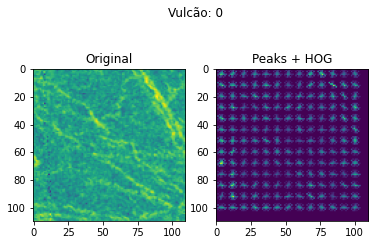

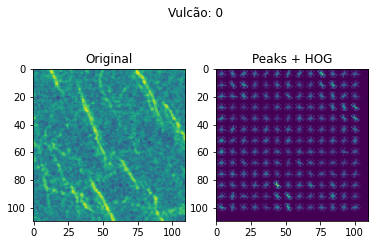

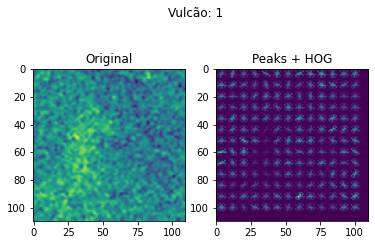

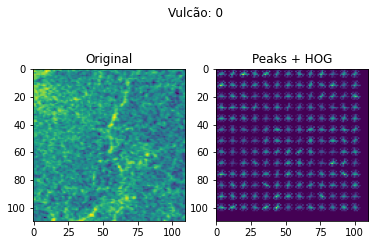

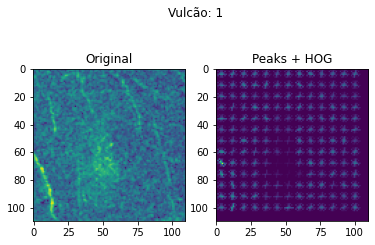

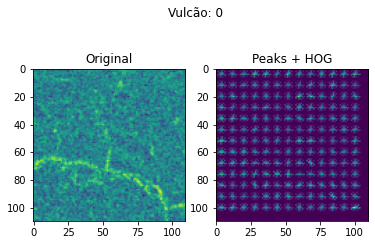

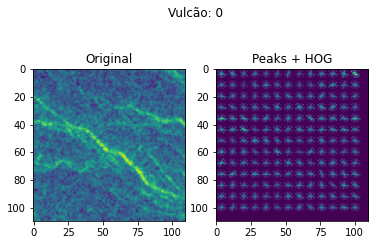

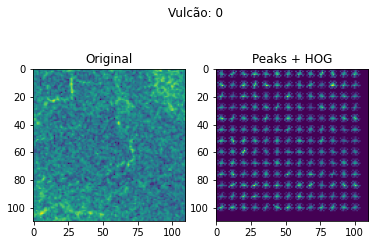

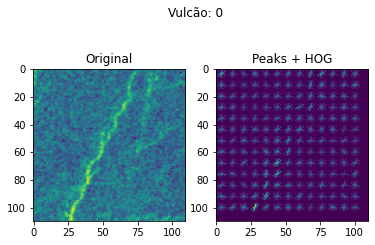

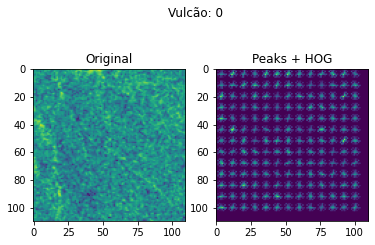

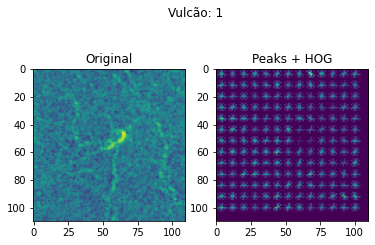

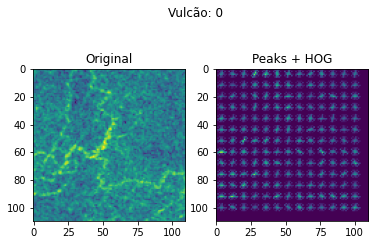

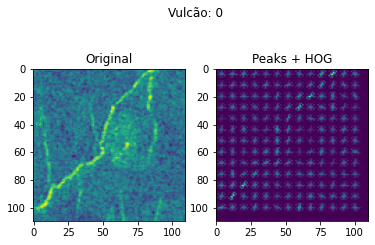

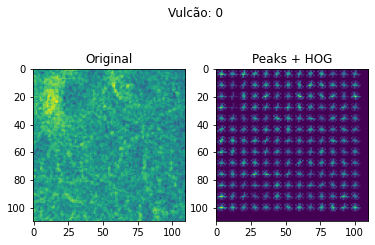

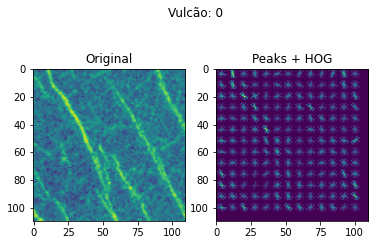

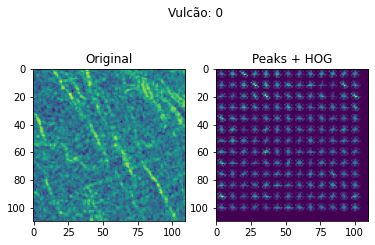

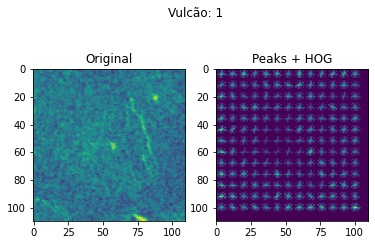

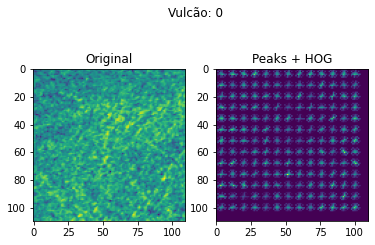

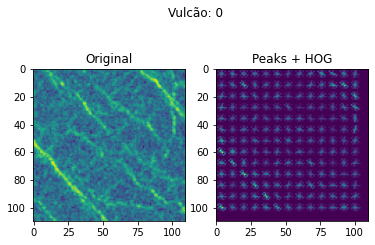

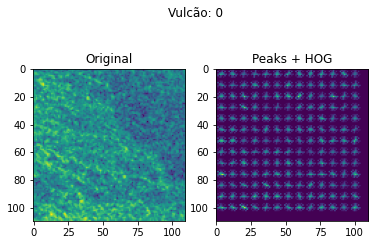

In [ ]:
# Plot

for i in range(0,20):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle('Vulcão: ' + str(resp.iloc[i,0]))
    ax1.imshow(np.array(feat.iloc[i]).reshape(110,110))
    ax1.set_title('Original')
    ax2.imshow(np.array(hogfeat.iloc[i]).reshape(110,110))
    ax2.set_title('Peaks + HOG')

#### Modelos

* Utilizei basicamente quatro tipos modelos para a classificação dos dados: 
 * Naive Bayes
 * LDA
 * QDA
 * SVM
    * Kernel linear
    * Kernel polinomial
    * Kernel RBF

In [ ]:
### Naive Bayes

model_nb = GaussianNB()


### LDA e QDA

model_lda = LinearDiscriminantAnalysis()
model_qda = QuadraticDiscriminantAnalysis()


### SVM

model_svm_lin = LinearSVC()
model_svm_pol = SVC(kernel='poly')
model_svm_rbf = SVC(kernel='rbf')

#### Cross Validation

* Em seguida para testar os modelos, na amostra de treinos, realizei a validação cruzada com 5 *folds*.
* Nas métricas que optei para avaliar a qualidade dos classificadores eu decidi pelo score de Acurácia, que revela a proporção de acerto do classificador, e F1, que atribui em seu valor final o erro do tipo 1 com o erro do tipo 2, ponderando desse modo o score final.

In [ ]:
### Classificadores Gaussianos

scoring = {"Accuracy": metrics.make_scorer(metrics.accuracy_score, greater_is_better = True, needs_proba = False), 
           'F1': metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)}

Score_nb = pd.DataFrame(index=['Accuracy', 'F1'], columns=['Original', 'Peak + HOG'])
for  i, score in zip(range(0,len(scoring)), scoring.values()):
       cv1_nb = cross_val_score(model_nb, X=feat, y=resp.iloc[:,0], cv = 5,
                scoring = score)
       cv2_nb = cross_val_score(model_nb, X=hogfeat, y=resp.iloc[:,0], cv = 5,
                scoring = score)
       Score_nb.iloc[i,:] = [cv1_nb.mean(), cv2_nb.mean()]


Score_lda = pd.DataFrame(index=['Accuracy', 'F1'], columns=['Original', 'Peak + HOG'])
for  i, score in zip(range(0,len(scoring)), scoring.values()):
        cv1_lda = cross_val_score(model_lda, X=feat, y=resp.iloc[:,0], cv = 5,
                scoring = score)
        cv2_lda = cross_val_score(model_lda, X=hogfeat, y=resp.iloc[:,0], cv = 5,
                scoring = score)
        Score_lda.iloc[i,:] = [cv1_lda.mean(), cv2_lda.mean()]


Score_qda = pd.DataFrame(index=['Accuracy', 'F1'], columns=['Original', 'Peak + HOG'])
for  i, score in zip(range(0,len(scoring)), scoring.values()):
      cv1_qda = cross_val_score(model_qda, X=feat, y=resp.iloc[:,0], cv = 5,
                scoring = score)
      cv2_qda = cross_val_score(model_qda, X=hogfeat, y=resp.iloc[:,0], cv = 5,
                scoring = score)
      Score_qda.iloc[i,:] = [cv1_qda.mean(), cv2_qda.mean()]

In [ ]:
### SVM linear

param_svm_lin = [{'C': [10, 100, 1000]}]

  #F1
    # Original
cv1o_svm_lin = GridSearchCV(model_svm_lin, param_grid = param_svm_lin, cv = 5, 
                          scoring = 'f1', verbose = 4, n_jobs = -1)
fit1o_svmlin = cv1o_svm_lin.fit(feat, resp.iloc[:,0])

    # Preprocessado
cv1p_svm_lin = GridSearchCV(model_svm_lin, param_grid = param_svm_lin, cv = 5, 
                          scoring = 'f1', verbose = 4, n_jobs = -1)
fit1p_svmlin = cv1p_svm_lin.fit(hogfeat, resp.iloc[:,0])

  # Accuracy
    # Original
cv2o_svm_lin = GridSearchCV(model_svm_lin, param_grid = param_svm_lin, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)
fit2o_svmlin = cv2o_svm_lin.fit(feat, resp.iloc[:,0])

    # Preprocessado
cv2p_svm_lin = GridSearchCV(model_svm_lin, param_grid = param_svm_lin, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)
fit2p_svmlin = cv2p_svm_lin.fit(hogfeat, resp.iloc[:,0])

In [ ]:
### SVM polinomial

param_svm_pol = [{'C': [10, 100, 1000],
                  'degree':[3,4],
                  'coef0': [-10,0,10]}]

  #F1
    # Original
cv1o_svm_pol = GridSearchCV(model_svm_pol, param_grid = param_svm_pol, cv = 5, 
                          scoring = 'f1', verbose = 4, n_jobs = -1)
fit1o_svmpol = cv1o_svm_pol.fit(feat, resp.iloc[:,0])

    # Preprocessado
cv1p_svm_pol = GridSearchCV(model_svm_pol, param_grid = param_svm_pol, cv = 5, 
                          scoring = 'f1', verbose = 4, n_jobs = -1)
fit1p_svmpol = cv1p_svm_pol.fit(hogfeat, resp.iloc[:,0])

  # Accuracy
    # Original
cv2o_svm_pol = GridSearchCV(model_svm_pol, param_grid = param_svm_pol, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)
fit2o_svmpol = cv2o_svm_pol.fit(feat, resp.iloc[:,0])

    # Preprocessado
cv2p_svm_pol = GridSearchCV(model_svm_pol, param_grid = param_svm_pol, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)
fit2p_svmpol = cv2p_svm_pol.fit(hogfeat, resp.iloc[:,0])

In [ ]:
#### SVM RBF

param_svm_rbf = [{'C': [10, 100, 1000],
                  'gamma': [10, 100, 1000]}]

  #F1
    # Original
cv1o_svm_rbf = GridSearchCV(model_svm_rbf, param_grid = param_svm_rbf, cv = 5, 
                          scoring = 'f1', verbose = 4, n_jobs = -1)
fit1o_svmrbf = cv1o_svm_rbf.fit(feat, resp.iloc[:,0])

    # Preprocessado
cv1p_svm_rbf = GridSearchCV(model_svm_rbf, param_grid = param_svm_rbf, cv = 5, 
                          scoring = 'f1', verbose = 4, n_jobs = -1)
fit1p_svmrbf = cv1p_svm_rbf.fit(hogfeat, resp.iloc[:,0])

  # Accuracy
    # Original
cv2o_svm_rbf = GridSearchCV(model_svm_rbf, param_grid = param_svm_rbf, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)
fit2o_svmrbf = cv2o_svm_rbf.fit(feat, resp.iloc[:,0])

    # Preprocessado
cv2p_svm_rbf = GridSearchCV(model_svm_rbf, param_grid = param_svm_rbf, cv = 5, 
                          scoring = 'accuracy', verbose = 4, n_jobs = -1)
fit2p_svmrbf = cv2p_svm_rbf.fit(hogfeat, resp.iloc[:,0])

#### Resultados


In [ ]:
#### NB - LDA - QDA

print('NB', Score_nb)
print('LDA', Score_lda)
print('QDA', Score_qda)

NB           Original Peak + HOG
Accuracy  0.328286   0.471143
F1         0.26281   0.303999
LDA           Original Peak + HOG
Accuracy  0.909714   0.825714
F1        0.647213   0.441133
QDA           Original Peak + HOG
Accuracy  0.398857   0.857143
F1        0.322288          0


* Para a análise dos dados originais, o melhor classificador gaussiano é o LDA, com 91% de acurácia e um score F1 de 65%. 
* Por outro lado, para os dados pré processados o resultado é ambíguo. Pois, primeiramente, o classificador de Bayes Ingênuo apresentou uma melhora em relação aos dados originais, porém não pode ser considerado o melhor, enquanto o classificador LDA teve uma perfomance melhor, mas um desempenho pior em comparação aos dados origianis, e, por fim, o classificador QDA teve o melhor desempenho no score de acurácia, porém no score F1 o seu valor foi zero, o que indicaria que o *recall* ou o *precision* foi igual a zero. Desse modo, é razoavel considerar o classificador LDA como o melhor para os dados pré processados, dado os resultados nos scores mais robustos do que o QDA.
* De qualquer modo, os dados pré processados não apresentou melhorias nos scores do classificador (LDA) que apresentou a melhor performance, sendo mais interessante considerar somente os dados originais.

In [ ]:
#### SVM
  #F1
    #Original
print('Original')
print('SVM linear: ', [fit1o_svmlin.best_estimator_, fit1o_svmlin.best_score_])
print('SVM polinomial: ',[fit1o_svmpol.best_estimator_, fit1o_svmpol.best_score_])
print('SVM rbf: ',[fit1o_svmrbf.best_estimator_, fit1o_svmrbf.best_score_])

    #Preprocess
print('Pre Processado')
print('SVM linear: ',[fit1p_svmlin.best_estimator_, fit1p_svmlin.best_score_])
print('SVM polinomial: ',[fit1p_svmpol.best_estimator_, fit1p_svmpol.best_score_])
print('SVM rbf: ',[fit1p_svmrbf.best_estimator_, fit1p_svmrbf.best_score_])


Original
SVM linear:  [LinearSVC(C=1000), 0.6577635166387369]
SVM polinomial:  [SVC(C=10, coef0=10, degree=4, kernel='poly'), 0.680294213315012]
SVM rbf:  [SVC(C=10, gamma=10), 0.0]
Pre Processado
SVM linear:  [LinearSVC(C=1000), 0.4344288413219564]
SVM polinomial:  [SVC(C=10, coef0=0, kernel='poly'), 0.5118987880651501]
SVM rbf:  [SVC(C=10, gamma=10), 0.0]


In [ ]:
#### SVM

  #Accuracy
    #Original
print('Original')
print('SVM linear: ', [fit2o_svmlin.best_estimator_, fit2o_svmlin.best_score_])
print('SVM polinomial: ',[fit2o_svmpol.best_estimator_, fit2o_svmpol.best_score_])
print('SVM rbf: ',[fit2o_svmrbf.best_estimator_, fit2o_svmrbf.best_score_])

    #Preprocess
print('Pre Processado')
print('SVM linear: ',[fit2p_svmlin.best_estimator_, fit2p_svmlin.best_score_])
print('SVM polinomial: ',[fit2p_svmpol.best_estimator_, fit2p_svmpol.best_score_])
print('SVM rbf: ',[fit2p_svmrbf.best_estimator_, fit2p_svmrbf.best_score_])

Original
SVM linear:  [LinearSVC(C=10), 0.9125714285714285]
SVM polinomial:  [SVC(C=10, coef0=10, degree=4, kernel='poly'), 0.916]
SVM rbf:  [SVC(C=10, gamma=10), 0.8571428571428571]
Pre Processado
SVM linear:  [LinearSVC(C=100), 0.8325714285714285]
SVM polinomial:  [SVC(C=10, coef0=0, kernel='poly'), 0.8731428571428571]
SVM rbf:  [SVC(C=10, gamma=10), 0.8571428571428571]


* No classificadores SVM o classificador foi o de kernel polinomial, com 91% de acurácia e 68% no score F1.
* O mesmo pode ser verificado para os dados pré processados.
* O modelo utilizando os dados originais teve uma performance superior aos dados pré processados.

#### Validação

In [ ]:
# Classificador Gaussiano

model_lda.fit(feat, resp['Volcano?'])

lda_pred_feat = model_lda.predict(feat_test)

print(metrics.confusion_matrix(resp_test['Volcano?'], lda_pred_feat))
print(metrics.accuracy_score(resp_test['Volcano?'], lda_pred_feat))
print(metrics.f1_score(resp_test['Volcano?'], lda_pred_feat))

[[2243   57]
 [ 185  249]]
0.9114850036576445
0.6729729729729731


In [ ]:
# SVM

svm_pred_feat = cv1o_svm_pol.predict(feat_test)

print(metrics.confusion_matrix(resp_test['Volcano?'], svm_pred_feat))
print(metrics.accuracy_score(resp_test['Volcano?'], svm_pred_feat))
print(metrics.f1_score(resp_test['Volcano?'], svm_pred_feat))

[[2226   74]
 [ 147  287]]
0.9191660570592538
0.7220125786163522


* Entre os dois modelos selecionados o que teve a melhor performance, ressaltado pelo score F1, foi o SVM com kernel polinomial (C=10 e coef0=0).

****

### Questão 2

*Prever, **somente a partir das imagens que têm ao menos um vulcão**, o "tipo" dele. Ou seja, deve ser resolvido o problema de **classificação multiclasse** onde os dados observados são as linhas do DataFrame ``feat`` para as quais a variável ``Volcano?`` é 1, e a variável resposta é a coluna ``Type`` do DataFrame ``resp``.*

#### Variáveis multiclasse

* Filtrei as linhas dos dados originais e pré processados associados a vulcões.

In [ ]:
### Variavel multiclasse

multi_index = np.array(resp['Volcano?']==1)

multi_feat = feat.loc[multi_index,:]
multi_hogfeat = hogfeat.loc[multi_index, :]
multi_resp = resp.loc[multi_index,:]

multi_index_test = np.array(resp_test['Volcano?']==1)

multi_feat_test = feat_test.loc[multi_index_test,:]
multi_hogfeat_test = hogfeat_test.loc[multi_index_test, :]
multi_resp_test = resp_test.loc[multi_index_test,:]


#### Modelos

In [ ]:
### Naive Bayes

ovr_nb = GaussianNB()

### LDA e QDA

model_lda = LinearDiscriminantAnalysis()
model_qda = QuadraticDiscriminantAnalysis()


### SVM

ovr_svm_lin = OneVsRestClassifier(LinearSVC(), n_jobs = -1)

ovr_svm_pol = OneVsRestClassifier(SVC(kernel='poly'), n_jobs = -1)

ovr_svm_rbf = OneVsRestClassifier(SVC(kernel='rbf'), n_jobs = -1)

#### Treino & Teste

* Separei os dados em treino e teste, na proporção 2/3, para os dados originais e pré processados.

In [ ]:
### Treino&Teste Split

  # Original
feat_tr, feat_te, resp_tr, resp_te = train_test_split(multi_feat, multi_resp, stratify = multi_resp['Type'], test_size = 1/3)

  # Preprocess
hogfeat_tr, hogfeat_te, resp_tr, resp_te = train_test_split(multi_hogfeat, multi_resp, stratify = multi_resp['Type'], test_size = 1/3)

In [ ]:
### Classificadores Gaussianos

  # Original

    # Naive Bayes
multi1_nb = ovr_nb.fit(feat_tr, resp_tr['Type'])

    # LDA
multi1_lda = model_lda.fit(feat_tr, resp_tr['Type'])

    # QDA
multi1_qda = model_qda.fit(feat_tr, resp_tr['Type'])


  # Preprocess
  
    # Naive Bayes
multi2_nb = ovr_nb.fit(hogfeat_tr, resp_tr['Type'])

    # LDA
multi2_lda = model_lda.fit(hogfeat_tr, resp_tr['Type'])

    # QDA
multi2_qda = model_qda.fit(hogfeat_tr, resp_tr['Type'])

In [ ]:
### SVM

  # Original

    # Linear
multi1_svm_lin = ovr_svm_lin.fit(feat_tr, resp_tr['Type'])

    # Polinomial
multi1_svm_pol = ovr_svm_pol.fit(feat_tr, resp_tr['Type'])

    # RBF
multi1_svm_rbf = ovr_svm_rbf.fit(feat_tr, resp_tr['Type'])


  # Preprocess

    # Linear
multi2_svm_lin = ovr_svm_lin.fit(hogfeat_tr, resp_tr['Type'])

    # Polinomial
multi2_svm_pol = ovr_svm_pol.fit(hogfeat_tr, resp_tr['Type'])

    # RBF
multi2_svm_rbf = ovr_svm_rbf.fit(hogfeat_tr, resp_tr['Type'])

#### Resultados

In [ ]:
#### Naive Bayes
pred1_nb = multi1_nb.predict(feat_te)

print('Naive Bayes - Original')
print(metrics.confusion_matrix(resp_te['Type'], pred1_nb))
accuracy1_nb = metrics.accuracy_score(resp_te['Type'], pred1_nb)
F1score1_nb = metrics.f1_score(resp_te['Type'], pred1_nb, average = 'macro')

print('')

pred2_nb = multi2_nb.predict(hogfeat_te)

print('Naive Bayes - Preprocess')
print(metrics.confusion_matrix(resp_te['Type'], pred2_nb))
accuracy2_nb = metrics.accuracy_score(resp_te['Type'], pred2_nb)
F1score2_nb = metrics.f1_score(resp_te['Type'], pred2_nb, average = 'macro')

Naive Bayes - Original
[[ 0  0  0 18]
 [ 0  0  0 31]
 [ 0  2  0 58]
 [ 0  0  0 58]]

Naive Bayes - Preprocess
[[ 4  2 10  2]
 [ 1  4 21  5]
 [ 3  4 40 13]
 [ 0  3 22 33]]


In [ ]:
#### LDA
pred1_lda = multi1_lda.predict(feat_te)

print('LDA - Original')
print(metrics.confusion_matrix(resp_te['Type'], pred1_lda))
accuracy1_lda = metrics.accuracy_score(resp_te['Type'], pred1_lda)
F1score1_lda = metrics.f1_score(resp_te['Type'], pred1_lda, average = 'macro')

print('')

pred2_lda = multi2_lda.predict(hogfeat_te)

print('LDA - Preprocess')
print(metrics.confusion_matrix(resp_te['Type'], pred2_lda))
accuracy2_lda = metrics.accuracy_score(resp_te['Type'], pred2_lda)
F1score2_lda = metrics.f1_score(resp_te['Type'], pred2_lda, average = 'macro')

LDA - Original
[[ 0  1  0 17]
 [ 0  0  0 31]
 [ 0  0  0 60]
 [ 0  0  0 58]]

LDA - Preprocess
[[ 3  3 11  1]
 [ 2  7 12 10]
 [ 6  4 36 14]
 [ 6  1 15 36]]


In [ ]:
#### QDA
pred1_qda = multi1_qda.predict(feat_te)

print('QDA - Original')
print(metrics.confusion_matrix(resp_te['Type'], pred1_qda))
accuracy1_qda = metrics.accuracy_score(resp_te['Type'], pred1_qda)
F1score1_qda = metrics.f1_score(resp_te['Type'], pred1_qda, average = 'macro')

print('')

pred2_qda = multi2_qda.predict(hogfeat_te)

print('QDA - Preprocess')
print(metrics.confusion_matrix(resp_te['Type'], pred2_qda))
accuracy2_qda = metrics.accuracy_score(resp_te['Type'], pred2_qda)
F1score2_qda = metrics.f1_score(resp_te['Type'], pred2_qda, average = 'macro')

QDA - Original
[[ 0 17  1  0]
 [ 0 31  0  0]
 [ 0 60  0  0]
 [ 0 58  0  0]]

QDA - Preprocess
[[ 2  9  5  2]
 [ 6 11  4 10]
 [12 21 10 17]
 [ 8 26 10 14]]


In [ ]:
  # NB
MultiScore_NB = pd.DataFrame(columns=['Original', 'Peak + HOG'], index=['Accuracy', 'F1'])
MultiScore_NB.iloc[:,0] = (accuracy1_nb, F1score1_nb)
MultiScore_NB.iloc[:,1] = (accuracy2_nb, F1score2_nb)

  # LDA
MultiScore_lda = pd.DataFrame(columns=['Original', 'Peak + HOG'], index=['Accuracy', 'F1'])
MultiScore_lda.iloc[:,0] = (accuracy1_lda, F1score1_lda)
MultiScore_lda.iloc[:,1] = (accuracy2_lda, F1score2_lda)

  # QDA
MultiScore_qda = pd.DataFrame(columns=['Original', 'Peak + HOG'], index=['Accuracy', 'F1'])
MultiScore_qda.iloc[:,0] = (accuracy1_qda, F1score1_qda)
MultiScore_qda.iloc[:,1] = (accuracy2_qda, F1score2_qda)


print('NB', MultiScore_NB)
print('LDA', MultiScore_lda)
print('QDA', MultiScore_qda)

NB           Original  Peak + HOG
Accuracy  0.347305    0.485030
F1        0.130045    0.401745
LDA           Original  Peak + HOG
Accuracy  0.347305    0.491018
F1        0.129464    0.404533
QDA           Original  Peak + HOG
Accuracy  0.185629    0.221557
F1        0.078680    0.203348


* Para os classificadores gaussianos, o que apresentou os melhores resultados para os dados origanais foi o Naive Bayes.
* Para os dados pré processados, a melhoria em comparação aos dados originais foi superior em todos os classificadores, mas o que teve a melhor performance foi o LDA, com 49% de acurácia e 40% no score F1.

In [ ]:
#### SVM Linear

  # Original
pred1_svm_lin = multi1_svm_lin.predict(feat_te)

print('SVM Linear - Original')
print(metrics.confusion_matrix(resp_te['Type'], pred1_svm_lin))
accuracy1_svm_lin = metrics.accuracy_score(resp_te['Type'], pred1_svm_lin)
F1score1_svm_lin = metrics.f1_score(resp_te['Type'], pred1_svm_lin, average = 'macro')

print('')

  # Preprocess
pred2_svm_lin = multi2_svm_lin.predict(hogfeat_te)

print('SVM Linear - Preprocess')
print(metrics.confusion_matrix(resp_te['Type'], pred2_svm_lin))
accuracy2_svm_lin = metrics.accuracy_score(resp_te['Type'], pred2_svm_lin)
F1score2_svm_lin = metrics.f1_score(resp_te['Type'], pred2_svm_lin, average = 'macro')

SVM Linear - Original
[[ 0  1  0 17]
 [ 0  4  1 26]
 [ 0  5  0 55]
 [ 0  5  0 53]]

SVM Linear - Preprocess
[[ 3  5  8  2]
 [ 1  4 16 10]
 [ 3  9 31 17]
 [ 2  5 14 37]]


In [ ]:
#### SVM Polinomial

  # Original
pred1_svm_pol = multi1_svm_pol.predict(feat_te)

print('SVM Polinomial - Original')
print(metrics.confusion_matrix(resp_te['Type'], pred1_svm_pol))
accuracy1_svm_pol = metrics.accuracy_score(resp_te['Type'], pred1_svm_pol)
F1score1_svm_pol = metrics.f1_score(resp_te['Type'], pred1_svm_pol, average = 'macro')

print('')

  # Preprocess
pred2_svm_pol = multi2_svm_pol.predict(hogfeat_te)

print('SVM Polinomial - Preprocess')
print(metrics.confusion_matrix(resp_te['Type'], pred2_svm_pol))
accuracy2_svm_pol = metrics.accuracy_score(resp_te['Type'], pred2_svm_pol)
F1score2_svm_pol =metrics.f1_score(resp_te['Type'], pred2_svm_pol, average = 'macro')

SVM Polinomial - Original
[[ 0  0  0 18]
 [ 0  0  0 31]
 [ 0  0  0 60]
 [ 0  0  0 58]]

SVM Polinomial - Preprocess
[[ 2  2 11  3]
 [ 1  1 18 11]
 [ 0  4 39 17]
 [ 0  2  8 48]]


In [ ]:
#### SVM RBF

  # Original
pred1_svm_rbf = multi1_svm_rbf.predict(feat_te)

print('SVM RBF - Original')
print(metrics.confusion_matrix(resp_te['Type'], pred1_svm_rbf))
accuracy1_svm_rbf = metrics.accuracy_score(resp_te['Type'], pred1_svm_rbf)
F1score1_svm_rbf = metrics.f1_score(resp_te['Type'], pred1_svm_rbf, average = 'macro')

print('')

  # Preprocess
pred2_svm_rbf = multi2_svm_rbf.predict(hogfeat_te)

print('SVM RBF - Preprocess')
print(metrics.confusion_matrix(resp_te['Type'], pred2_svm_rbf))
accuracy2_svm_rbf = metrics.accuracy_score(resp_te['Type'], pred2_svm_rbf)
F1score2_svm_rbf = metrics.f1_score(resp_te['Type'], pred2_svm_rbf, average = 'macro')

SVM RBF - Original
[[ 0  0  0 18]
 [ 0  0  0 31]
 [ 0  0  0 60]
 [ 0  0  0 58]]

SVM RBF - Preprocess
[[ 0  4  9  5]
 [ 0  3 14 14]
 [ 0  5 31 24]
 [ 0  1  5 52]]


In [ ]:
  # SVM linear
MultiScore_svm_lin = pd.DataFrame(columns=['Original', 'Peak + HOG'], index=['Accuracy', 'F1'])
MultiScore_svm_lin.iloc[:,0] = (accuracy1_svm_lin, F1score1_svm_lin)
MultiScore_svm_lin.iloc[:,1] = (accuracy2_svm_lin, F1score2_svm_lin)

  # SVM Polinomial
MultiScore_svm_pol = pd.DataFrame(columns=['Original', 'Peak + HOG'], index=['Accuracy', 'F1'])
MultiScore_svm_pol.iloc[:,0] = (accuracy1_svm_pol, F1score1_svm_pol)
MultiScore_svm_pol.iloc[:,1] = (accuracy2_svm_pol, F1score2_svm_pol)

  # SVM RBF
MultiScore_svm_rbf = pd.DataFrame(columns=['Original', 'Peak + HOG'], index=['Accuracy', 'F1'])
MultiScore_svm_rbf.iloc[:,0] = (accuracy1_svm_rbf, F1score1_svm_rbf)
MultiScore_svm_rbf.iloc[:,1] = (accuracy2_svm_rbf, F1score2_svm_rbf)


print('Lin', MultiScore_svm_lin)
print('Pol', MultiScore_svm_pol)
print('RBF', MultiScore_svm_rbf)

Lin           Original  Peak + HOG
Accuracy  0.341317    0.449102
F1        0.170273    0.361941
Pol           Original  Peak + HOG
Accuracy  0.347305    0.538922
F1        0.128889    0.378684
RBF           Original  Peak + HOG
Accuracy  0.347305    0.514970
F1        0.128889    0.334278


* Nos classificadores SVM, as performances foram similares aos classificadores gaussianos para os dados originais, com apenas uma superioridade ínfima no SVM com kernel linear.
* Quando se compara com os dados pré processados, todos os kernels apresentaram uma melhora considerável, se destacando como o melhor o de kernel polinomial.

#### Validação

In [ ]:
### Classificador Gaussiano

model_lda.fit(multi_hogfeat, multi_resp['Type'])

lda_predmulti_hogfeat = model_lda.predict(multi_hogfeat_test)

print(metrics.confusion_matrix(multi_resp_test['Type'], lda_predmulti_hogfeat))
print(metrics.accuracy_score(multi_resp_test['Type'], lda_predmulti_hogfeat))
print(metrics.f1_score(multi_resp_test['Type'], lda_predmulti_hogfeat, average = 'macro'))

[[ 5  7 17  6]
 [ 6 16 45 21]
 [13 34 60 41]
 [ 6 20 58 79]]
0.3686635944700461
0.30582915641924296


In [ ]:
### SVM

ovr_svm_pol.fit(multi_hogfeat, multi_resp['Type'])

svm_predmulti_hogfeat = ovr_svm_pol.predict(multi_hogfeat_test)

print(metrics.confusion_matrix(multi_resp_test['Type'], svm_predmulti_hogfeat))
print(metrics.accuracy_score(multi_resp_test['Type'], svm_predmulti_hogfeat))
print(metrics.f1_score(multi_resp_test['Type'], svm_predmulti_hogfeat, average = 'macro'))

[[  4   6  17   8]
 [  1  12  46  29]
 [  1   6  94  47]
 [  0   7  46 110]]
0.5069124423963134
0.3871654144250988


* Dos dois classificadores selecionados, O SVM com kernel polinomial teve um desempenho superior ao modelo LDA com uma acurácia e score F1 consideravelmente maior.

****